In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

# TRAIN

In [2]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/presentacion/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/presentacion/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [3]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
1,-0.000762,3178.86960,1.584,1.412555,8.697627,0.467034,0,5,0.478848,NO
2,-0.280848,2433.71730,2.986,1.415133,5.036993,1.305065,0,1,0.616979,UNKNOWN
3,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
4,-0.140882,796.06140,1.530,0.716918,0.978448,0.231184,0,0,0.037146,YES
...,...,...,...,...,...,...,...,...,...,...
95,-0.019967,759.53076,2.055,0.703017,0.616965,0.424818,0,0,0.258356,UNKNOWN
96,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
97,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,UNKNOWN
98,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,NO


<Axes: title={'center': 'antonimos'}, xlabel='CLASS'>

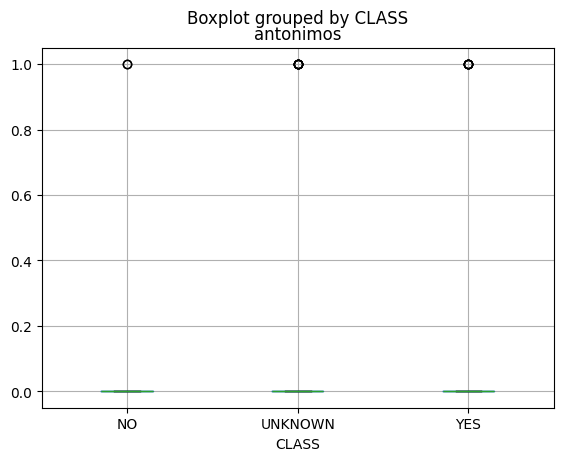

In [4]:
train.boxplot(by="CLASS",column="antonimos")

In [5]:
train=train.drop(["antonimos","sim_faltantes","distancias","suma"],axis=1)
train

,entropias,mutual_info,m_earth,max_info_p,relaciones,CLASS
0,0.000,0.000000,0.000000,0.000000,0,YES
1,1.584,1.412555,8.697627,0.467034,5,NO
2,2.986,1.415133,5.036993,1.305065,1,UNKNOWN
3,0.000,0.000000,0.000000,0.000000,0,YES
4,1.530,0.716918,0.978448,0.231184,0,YES
...,...,...,...,...,...,...
95,2.055,0.703017,0.616965,0.424818,0,UNKNOWN
96,0.000,0.000000,0.000000,0.000000,0,YES
97,0.000,0.000000,0.000000,0.000000,0,UNKNOWN
98,0.000,0.000000,0.000000,0.000000,0,NO


In [6]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [7]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [8]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

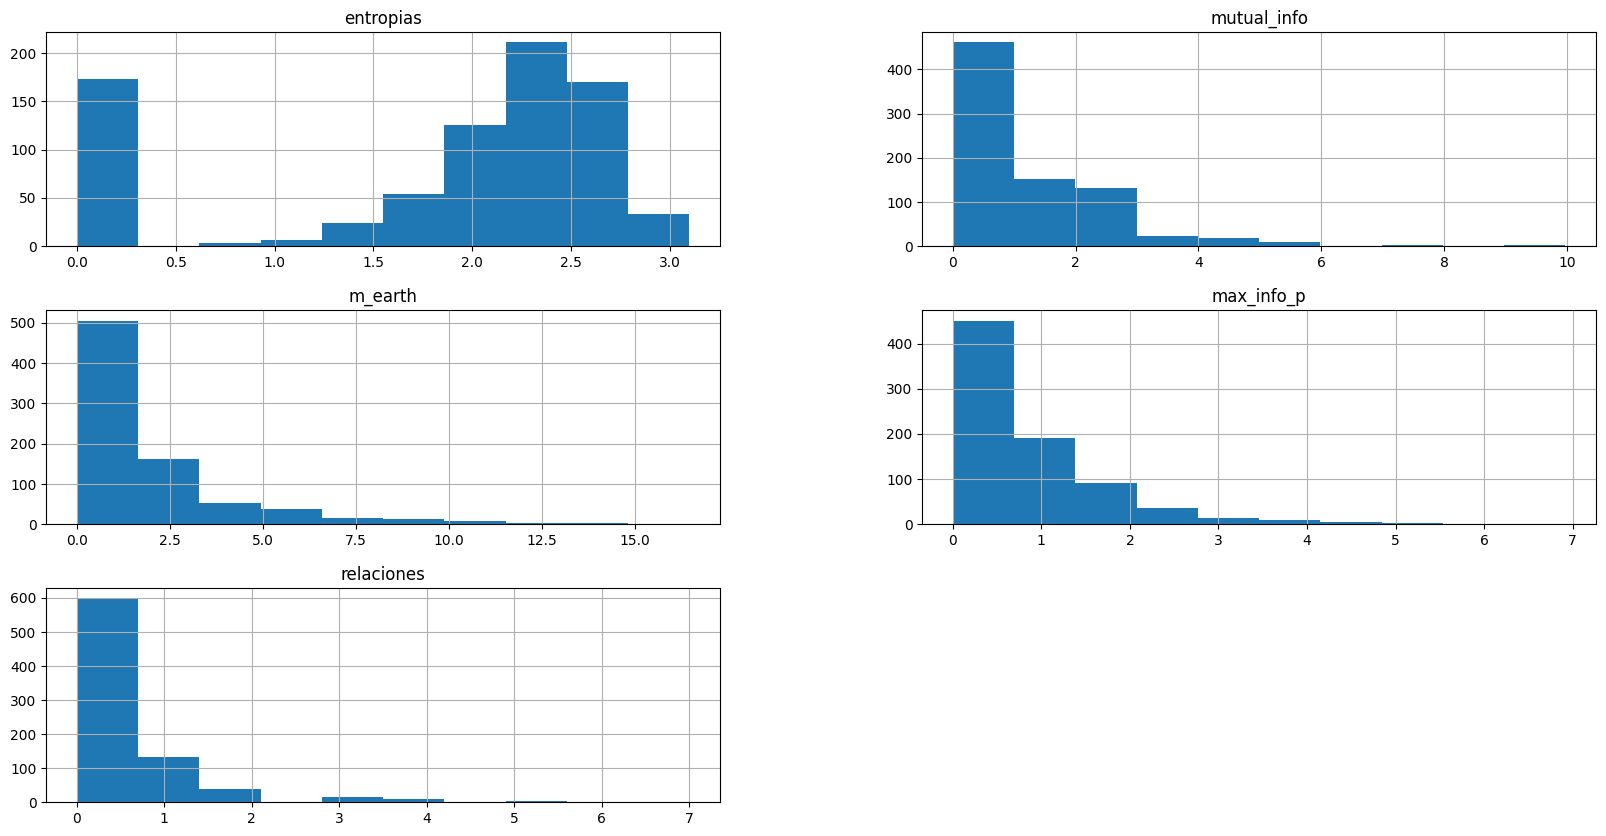

In [9]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [10]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/GHS/presentacion/GHS_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/GHS/presentacion/GHS_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [11]:
test=test.drop(["antonimos","sim_faltantes","distancias","suma"],axis=1)
test

,entropias,mutual_info,m_earth,max_info_p,relaciones,CLASS
0,2.333,1.000000,0.632621,1.000000,0,ENTAILMENT
1,2.540,14.564846,8.494168,8.056726,2,NONENTAILMENT
2,2.569,7.767979,10.491023,4.870435,3,NONENTAILMENT
3,1.379,0.706067,0.250809,0.480053,1,ENTAILMENT
4,2.735,15.845889,61.144998,8.569524,1,NONENTAILMENT
...,...,...,...,...,...,...
95,2.633,10.538611,12.300704,5.458198,0,NONENTAILMENT
96,2.793,2.108088,7.435420,1.351854,0,ENTAILMENT
97,2.642,12.651247,14.923519,6.705415,3,NONENTAILMENT
98,2.651,9.837451,7.637365,5.860400,2,NONENTAILMENT


In [12]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [13]:
# GHS
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [14]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [15]:
model = linear_model.LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [16]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [17]:
model.decision_function(X)

array([ 9.30043747e-01, -4.29258222e-01,  2.63780253e-01,  9.30043747e-01,
        1.54868046e-01,  5.78890298e-01,  9.30043747e-01,  9.30043747e-01,
        6.59667781e-02, -9.51910588e-01,  2.05223692e-01,  9.30043747e-01,
        2.27949360e-01,  3.72788282e-01,  5.69028605e-01,  9.30043747e-01,
       -3.57630915e-01,  3.31797391e-01,  4.23544179e-01,  3.32005838e-01,
        4.81904467e-01,  2.21083358e-01,  5.58377045e-01,  3.95381138e-01,
       -9.54593025e-02,  2.02508795e-01,  2.75559123e-01,  2.94782496e-01,
        3.04548917e-01,  3.82561179e-01,  4.09085325e-01,  3.20041727e-01,
        2.56054890e-01,  3.22147202e-01,  3.66851338e-01,  2.07372741e-01,
        3.19495189e-01,  5.49296881e-01,  3.13468678e-01,  9.30043747e-01,
        3.61383091e-01,  2.84773615e-01, -6.27748982e-01,  4.01847921e-01,
        3.35276667e-01,  4.12550490e-01,  3.19720884e-01,  4.49845804e-01,
        3.57618989e-01,  4.23705740e-01,  2.59726328e-02,  4.78985286e-01,
       -8.22206607e-01,  

In [18]:
labels=train.columns[:-1]
labels

Index(['entropias', 'mutual_info', 'm_earth', 'max_info_p', 'relaciones'], dtype='object')

In [19]:
model.classes_

array([0, 1])

In [20]:
model.coef_[0]

array([-0.08273856, -1.65057061,  0.23596859,  0.71733077, -0.11050576])

In [21]:
coeficientes=model.coef_[0]

In [22]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  3 max_info_p 1 mutual_info


In [23]:
n_columns=train.shape[1]-1

In [24]:
n_columns

5

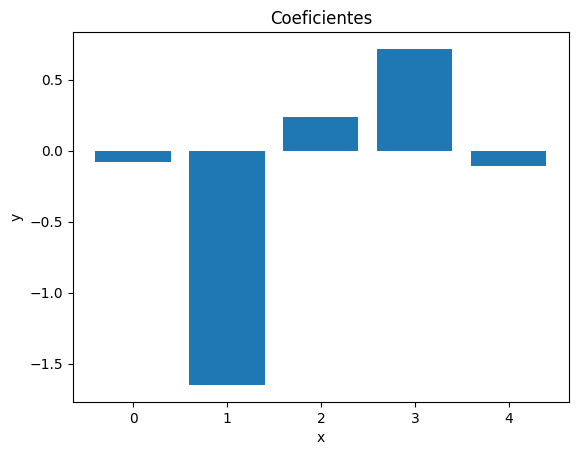

In [25]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [26]:
predictions = model.predict(X_test)

In [27]:
print(confusion_matrix(y_test, predictions))

[[327  74]
 [  1 398]]


In [28]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.91
precision:  0.84
recall 1.0
f1_score:  0.91
matthews_score:  0.83


In [29]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [30]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [31]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.760000 (0.051468)
Logistic Regression: 0.860000 (0.065845)
Logistic Regression: 0.810000 (0.040767)


In [32]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.590000 (0.082829)


In [33]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [34]:
model = linear_model.LogisticRegression().fit(X_train,y_train)

In [35]:
explainer = shap.Explainer(model,X_train)
shap_values = explainer.shap_values(X_test)

In [36]:
explainer.expected_value

-0.09102373882666492

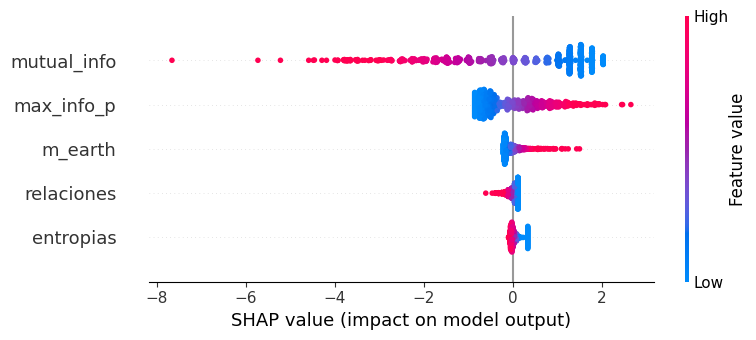

In [40]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [39]:
shap.plots.beeswarm(shap_values[:,1])

TypeError: The beeswarm plot requires an `Explanation` object as the `shap_values` argument.